In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import platform
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates, ticker

In [2]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
print("2013-01-01 ~ 2018-12-31 총 길이 : {}".format(len(pd.date_range(start = "2013-01-01 00:00:00", 
                                                                    end = "2018-12-31 23:00:00", freq = "1h"))))
for i in range(2013, 2019) :
    print("{}년 길이 : {}".format(i, len(pd.date_range(start = f"{i}-01-01 00:00:00", 
                                                    end = f"{i}-12-31 23:00:00", freq = "1h"))))

2013-01-01 ~ 2018-12-31 총 길이 : 52584
2013년 길이 : 8760
2014년 길이 : 8760
2015년 길이 : 8760
2016년 길이 : 8784
2017년 길이 : 8760
2018년 길이 : 8760


In [4]:
train = pd.read_csv("../CSV/train_data.csv", parse_dates = ["일시"])
test = pd.read_csv("../CSV/pred_test.csv", parse_dates = ["일시"])
submission = pd.read_csv('../CSV/가스공급량 수요예측 모델개발 data/sample_submission.csv')

In [5]:
train.head(3)

,연월일,시간,일시,year,month,day,hour,weekday,구분,구분_int,공급량,기온(°C)
0,2013-01-01,1,2013-01-01 00:00:00,2013,1,1,0,1,A,0,2497.129,-8.3
1,2013-01-01,2,2013-01-01 01:00:00,2013,1,1,1,1,A,0,2363.265,-8.5
2,2013-01-01,3,2013-01-01 02:00:00,2013,1,1,2,1,A,0,2258.505,-8.4


In [6]:
test.head(3)

,일자|시간|구분,일자,시간,구분,구분_int,일시,year,month,day,hour,weekday,기온(°C)
0,2019-01-01 01 A,2019-01-01,1,A,0,2019-01-01 00:00:00,2019,1,1,0,1,-2.4
1,2019-01-01 02 A,2019-01-01,2,A,0,2019-01-01 01:00:00,2019,1,1,1,1,-2.4
2,2019-01-01 03 A,2019-01-01,3,A,0,2019-01-01 02:00:00,2019,1,1,2,1,-2.7


In [7]:
submission.head(3)

,일자|시간|구분,공급량
0,2019-01-01 01 A,0
1,2019-01-01 02 A,0
2,2019-01-01 03 A,0


In [8]:
print(train.info())
print()
print(test.info())
print()
print(submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   연월일      368088 non-null  object        
 1   시간       368088 non-null  int64         
 2   일시       368088 non-null  datetime64[ns]
 3   year     368088 non-null  int64         
 4   month    368088 non-null  int64         
 5   day      368088 non-null  int64         
 6   hour     368088 non-null  int64         
 7   weekday  368088 non-null  int64         
 8   구분       368088 non-null  object        
 9   구분_int   368088 non-null  int64         
 10  공급량      368088 non-null  float64       
 11  기온(°C)   368088 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(7), object(2)
memory usage: 33.7+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
--

In [9]:
train["구분"].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

In [91]:
# plt.figure(figsize = (30, 15))
# plt.grid(True, axis = "both", alpha = 0.5, linestyle = "--")

# ax = plt.gca()
# ax.xaxis.set_major_locator(dates.MonthLocator(interval = 5))
# ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m"))
# ax.xaxis.set_minor_locator(dates.MonthLocator(interval = 1))

# ax.yaxis.set_major_locator(ticker.MultipleLocator(500)) ## y값이 0.25의 배수인 경우마다 메인 눈금 표시
# # ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos:f'{100*x:.0f}%')) ## 메인 눈금 표시형식
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(100)) ## y축 서브 눈금 표시

# ax.tick_params(axis = "both", which = "major", length = 10, width = 2)
# ax.tick_params(axis = "x", which = "major", labelsize = 17, rotation = 20)
# ax.tick_params(axis = "y", which = "major", labelsize = 20)
# ax.tick_params(axis = "x", which = "minor", length = 5, width = 1)
# ax.tick_params(axis = "y", which = "minor", length = 5, width = 1)

# ax.tick_params(axis = "both", which = "major", length = 10, width = 2)
# ax.tick_params(axis = "x", which = "major", labelsize = 17, rotation = 20)
# ax.tick_params(axis = "y", which = "major", labelsize = 20)
# ax.tick_params(axis = "x", which = "minor", length = 5, width = 1)
# ax.tick_params(axis = "y", which = "minor", length = 5, width = 1)

# plt.xlabel("일시", fontsize = 20)
# plt.ylabel("공급량", fontsize = 20)

# sns.lineplot(x = "일시", y = "공급량", data = train)

# # plt.gcf().savefig("./PNG/뉴스 개수 이동평균선.png")

In [26]:
grouped_gas = train.groupby("구분")["공급량"].mean()
grouped_gas

구분
A    1167.014483
B     958.564621
C     131.585481
D     664.626452
E    1395.356673
G    2070.685900
H     248.866646
Name: 공급량, dtype: float64

In [27]:
grouped_gas.keys()

Index(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype='object', name='구분')

In [29]:
grouped_gas.values

array([1167.014483  ,  958.56462129,  131.58548064,  664.62645232,
       1395.35667254, 2070.68590018,  248.86664643])

In [90]:
# x_ticks = list(grouped_gas.keys())
# ax1 = grouped_gas.plot(kind = "bar", figsize = (15, 10), linewidth = 5, fontsize = 15, xticks = x_ticks)
# ax1.set_xlabel("구분", fontdict = {"fontsize" : 16})
# ax1.set_ylabel("공급량", fontdict = {"fontsize" : 16})

In [ ]:
grouped_gas = train.groupby("구분")["공급량"].mean()
grouped_gas

In [34]:
grouped_mean = train.groupby("구분").mean()
grouped_mean

,시간,year,month,day,hour,weekday,구분_int,공급량,기온(°C)
구분,,,,,,,,,
A,12.5,2015.500228,6.523962,15.726609,11.5,3.0,0.0,1167.014483,13.20267
B,12.5,2015.500228,6.523962,15.726609,11.5,3.0,1.0,958.564621,13.20267
C,12.5,2015.500228,6.523962,15.726609,11.5,3.0,2.0,131.585481,13.20267
D,12.5,2015.500228,6.523962,15.726609,11.5,3.0,3.0,664.626452,13.20267
E,12.5,2015.500228,6.523962,15.726609,11.5,3.0,4.0,1395.356673,13.20267
G,12.5,2015.500228,6.523962,15.726609,11.5,3.0,5.0,2070.685900,13.20267
H,12.5,2015.500228,6.523962,15.726609,11.5,3.0,6.0,248.866646,13.20267


Text(0.5, 1.0, '구분별 공급량에 대한 Bar Plot')

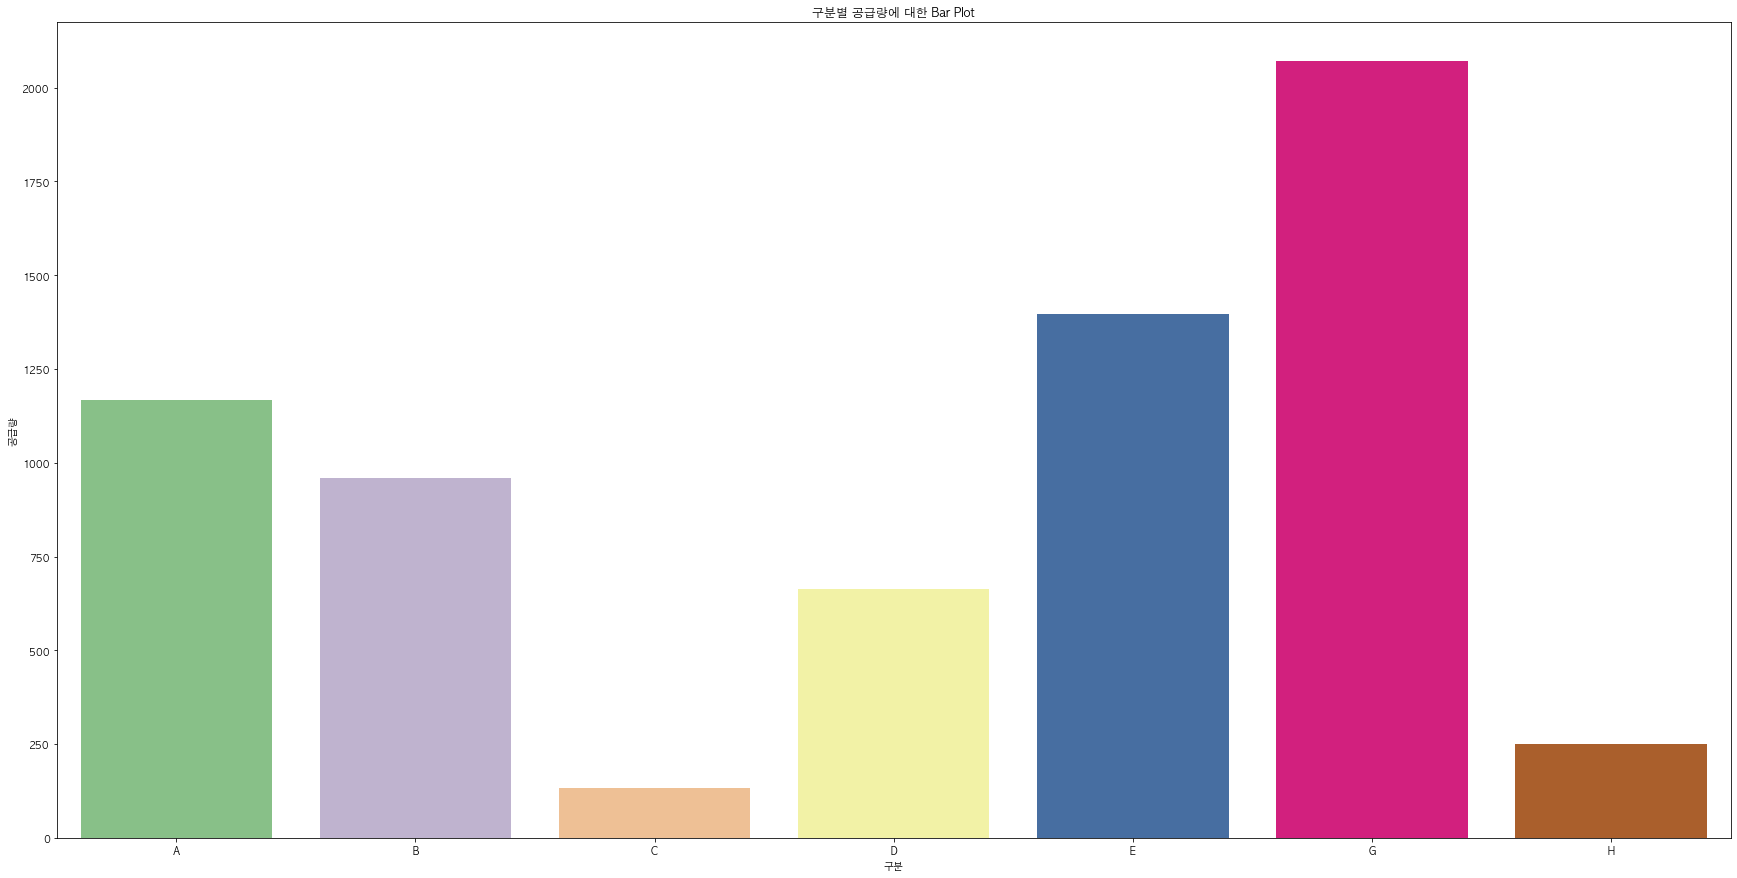

In [41]:
plt.figure(figsize = (30, 15))
sns.barplot(x = grouped_mean.index, y = "공급량", data = grouped_mean, palette = "Accent")
plt.title("구분별 공급량에 대한 Bar Plot")

Text(0.5, 1.0, '구분별 공급량에 대한 Box Plot')

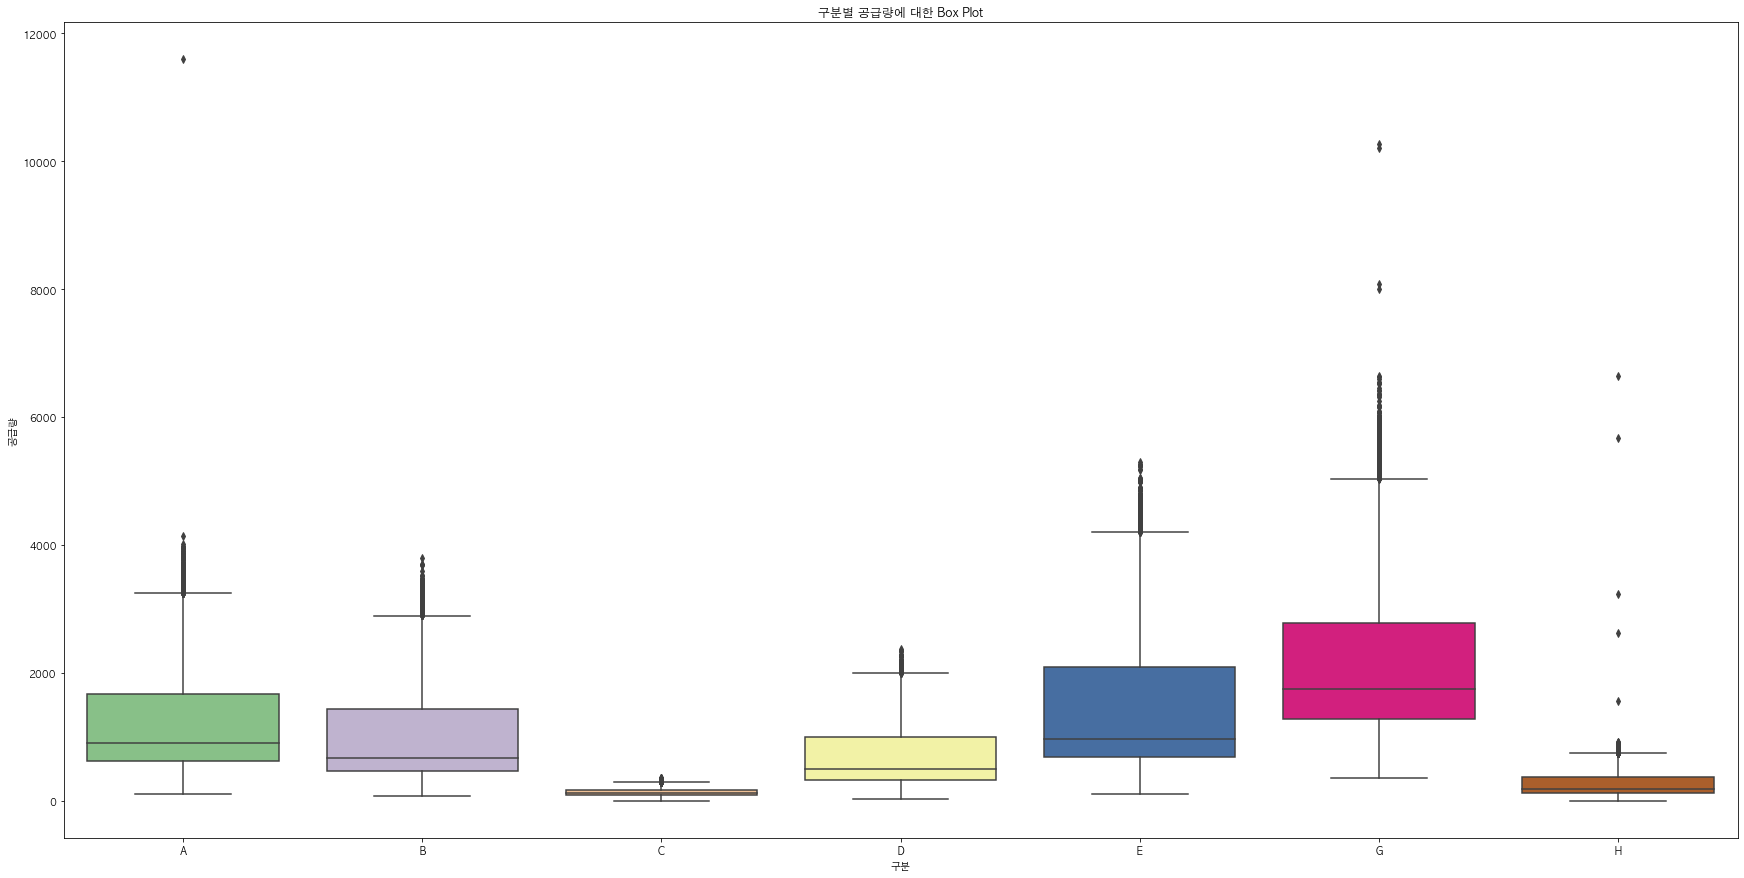

In [45]:
plt.figure(figsize = (30, 15))
sns.boxplot(x = "구분", y = "공급량", data = train, palette = "Accent")
plt.title("구분별 공급량에 대한 Box Plot")

<Figure size 2160x1080 with 0 Axes>

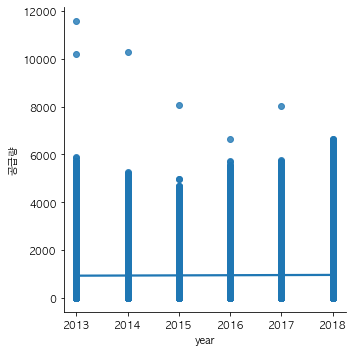

In [50]:
plt.figure(figsize = (30, 15))
sns.lmplot(x = "year", y = "공급량", data = train)

### 구분별 공급량 개수 확인
* A, B, C, D, E, G, H -> 모두 52584개

<AxesSubplot:xlabel='구분', ylabel='count'>

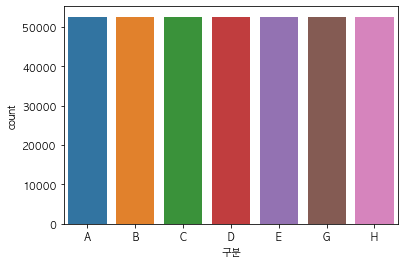

In [88]:
sns.countplot(x = "구분", data = train)

In [47]:
train.columns

Index(['연월일', '시간', '일시', 'year', 'month', 'day', 'hour', 'weekday', '구분',
       '구분_int', '공급량', '기온(°C)'],
      dtype='object')

In [51]:
year_2013 = train.loc[train["year"] == 2013] # A ~ H
year_2014 = train.loc[train["year"] == 2014]
year_2015 = train.loc[train["year"] == 2015]
year_2016 = train.loc[train["year"] == 2016]
year_2017 = train.loc[train["year"] == 2017]
year_2018 = train.loc[train["year"] == 2018]

print("year_2013 shape :", year_2013.shape)
print("year_2014 shape :", year_2014.shape)
print("year_2015 shape :", year_2015.shape)
print("year_2016 shape :", year_2016.shape)
print("year_2017 shape :", year_2017.shape)
print("year_2018 shape :", year_2018.shape)

year_2013 shape : (61320, 12)
year_2014 shape : (61320, 12)
year_2015 shape : (61320, 12)
year_2016 shape : (61488, 12)
year_2017 shape : (61320, 12)
year_2018 shape : (61320, 12)


In [52]:
grouped_A = train.loc[train["구분"] == "A"] # 2013 ~ 2018
grouped_B = train.loc[train["구분"] == "B"]
grouped_C = train.loc[train["구분"] == "C"]
grouped_D = train.loc[train["구분"] == "D"]
grouped_E = train.loc[train["구분"] == "E"]
grouped_G = train.loc[train["구분"] == "G"]
grouped_H = train.loc[train["구분"] == "H"]

print("grouped_A shape :", grouped_A.shape)
print("grouped_B shape :", grouped_B.shape)
print("grouped_C shape :", grouped_C.shape)
print("grouped_D shape :", grouped_D.shape)
print("grouped_E shape :", grouped_E.shape)
print("grouped_G shape :", grouped_G.shape)
print("grouped_H shape :", grouped_H.shape)

grouped_A shape : (52584, 12)
grouped_B shape : (52584, 12)
grouped_C shape : (52584, 12)
grouped_D shape : (52584, 12)
grouped_E shape : (52584, 12)
grouped_G shape : (52584, 12)
grouped_H shape : (52584, 12)


### 연도별 월별 공급량 평균

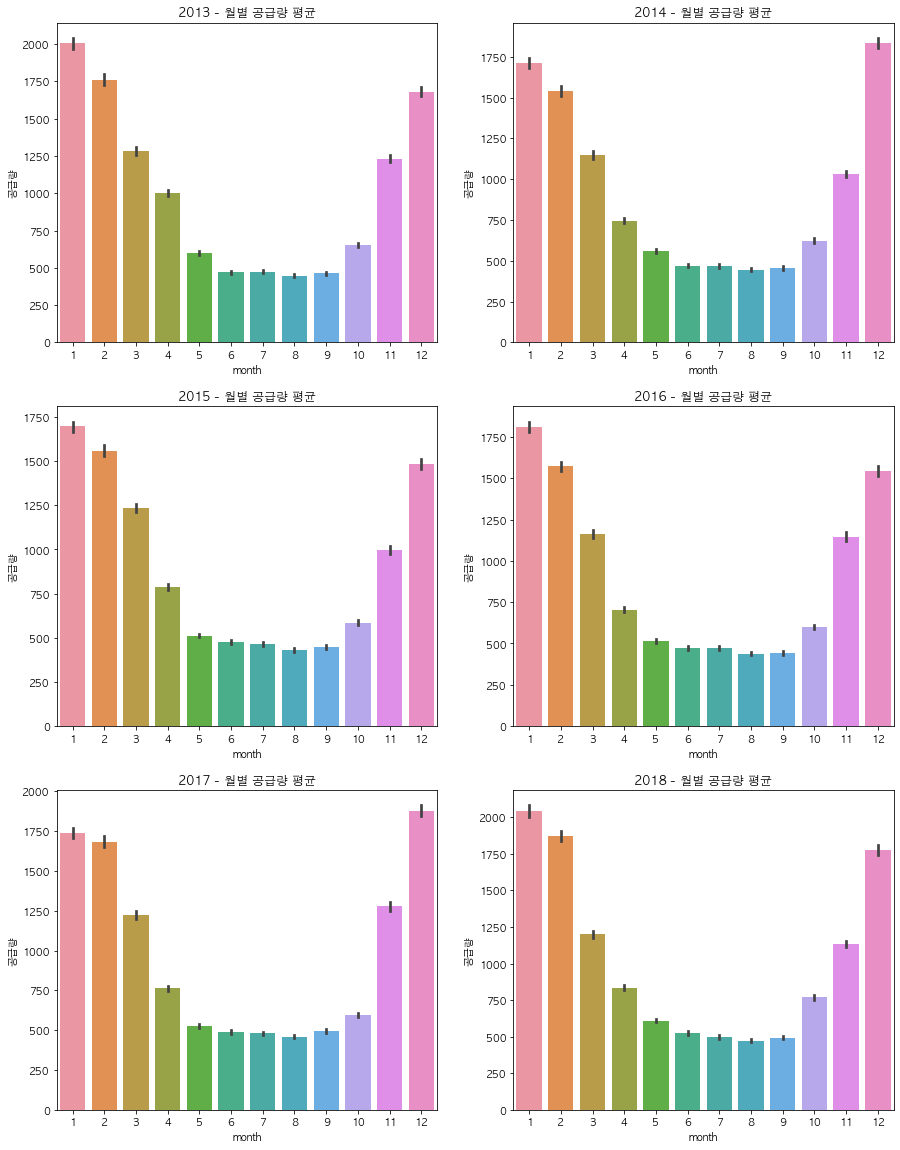

In [62]:
year_list = [year_2013, year_2014, year_2015, year_2016, year_2017, year_2018]

i = 0

plt.figure(figsize = (15, 20))

for data in year_list :
    i += 1
    plt.subplot(3, 2, i)
#     plt.ylim([0, 2250])
    sns.barplot(x = "month", y = "공급량", data = data)
    plt.title(f"{data['year'].unique()[0]} - 월별 공급량 평균")

### 구분별 월별 공급량 평균

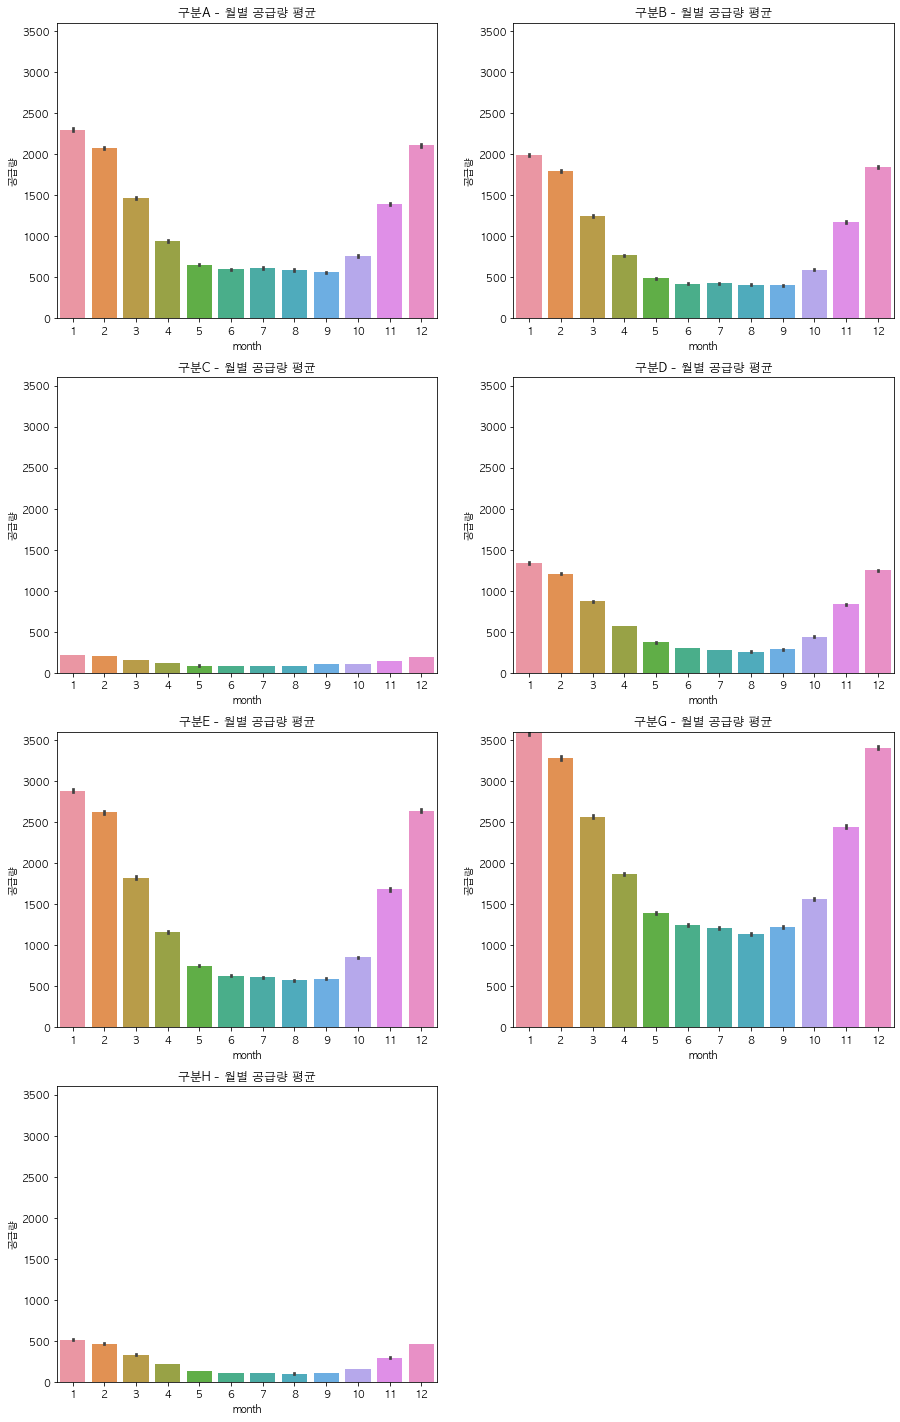

In [92]:
group_list = [grouped_A, grouped_B, grouped_C, 
             grouped_D, grouped_E, grouped_G, grouped_H]

i = 0

plt.figure(figsize = (15, 25))

for data in group_list :
    i += 1
    plt.subplot(4, 2, i)
    plt.ylim([0, 3600])
    sns.barplot(x = "month", y = "공급량", data = data)
    plt.title(f"구분{data['구분'].unique()[0]} - 월별 공급량 평균")

In [66]:
weather_2013 = grouped_A.loc[grouped_A["year"] == 2013]
weather_2014 = grouped_A.loc[grouped_A["year"] == 2014]
weather_2015 = grouped_A.loc[grouped_A["year"] == 2015]
weather_2016 = grouped_A.loc[grouped_A["year"] == 2016]
weather_2017 = grouped_A.loc[grouped_A["year"] == 2017]
weather_2018 = grouped_A.loc[grouped_A["year"] == 2018]

print(weather_2013.shape)
print(weather_2014.shape)
print(weather_2015.shape)
print(weather_2016.shape)
print(weather_2017.shape)
print(weather_2018.shape)

(8760, 12)
(8760, 12)
(8760, 12)
(8784, 12)
(8760, 12)
(8760, 12)


### 연도별 월별 기온 평균

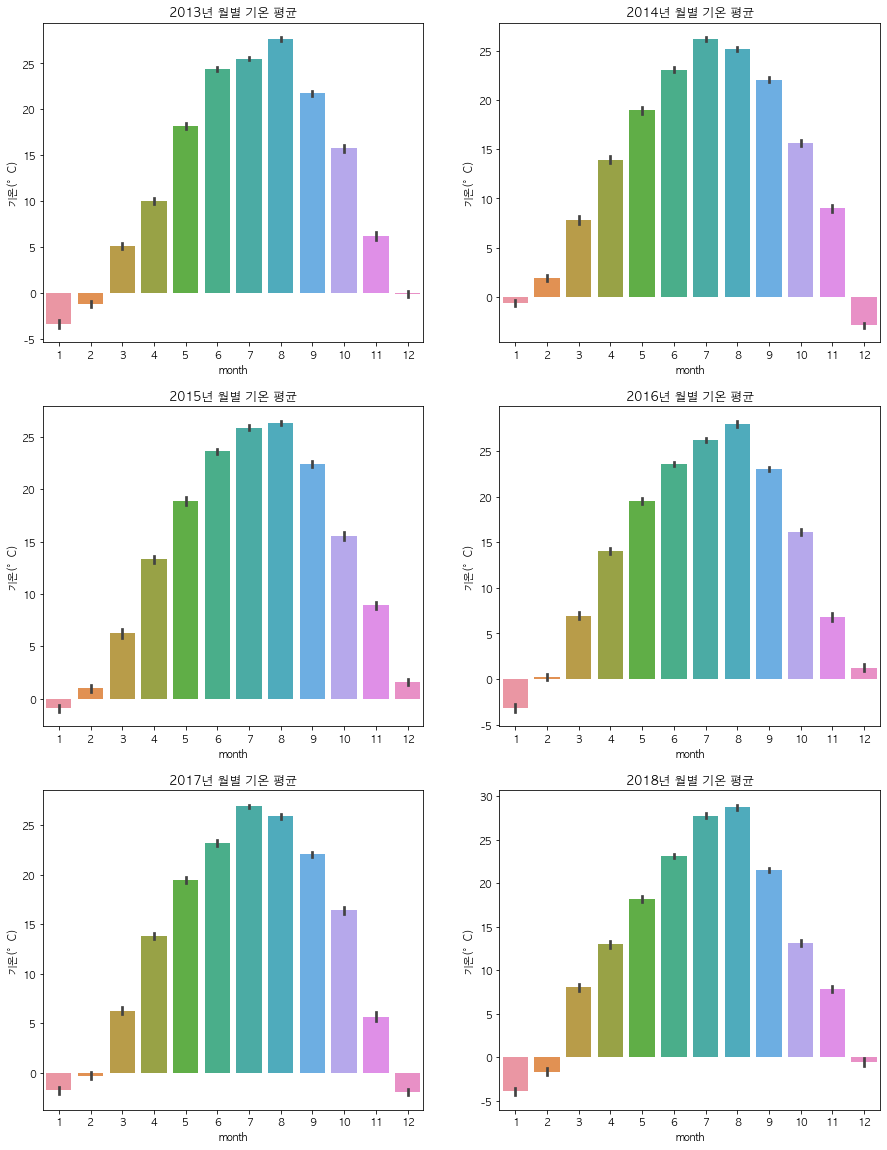

In [86]:
weather_list = [weather_2013, weather_2014, weather_2015, 
                weather_2016, weather_2017, weather_2018]

i = 0
y = 2013
plt.figure(figsize = (15, 20))

for data in weather_list :
    i += 1
    plt.subplot(3, 2, i)
#     plt.ylim([0, 3600])
    sns.barplot(x = "month", y = "기온(°C)", data = data)
    plt.title(f"{y}년 월별 기온 평균")
    y += 1

In [69]:
ym_mean_data = train.groupby(["year", "month"]).mean()
ym_mean_data

시간   day  hour   weekday  구분_int          공급량     기온(°C)
year month                                                            
2013 1      12.5  16.0  11.5  2.903226     3.0  2004.408120  -3.452554
     2      12.5  14.5  11.5  3.000000     3.0  1761.753005  -1.222917
     3      12.5  16.0  11.5  3.193548     3.0  1283.299542   5.090457
     4      12.5  15.5  11.5  2.833333     3.0  1000.642840   9.982917
     5      12.5  16.0  11.5  3.000000     3.0   600.020731  18.191667
...          ...   ...   ...       ...     ...          ...        ...
2018 8      12.5  16.0  11.5  3.000000     3.0   472.225603  28.736425
     9      12.5  15.5  11.5  3.166667     3.0   494.143763  21.498750
     10     12.5  16.0  11.5  2.806452     3.0   768.472603  13.089113
     11     12.5  15.5  11.5  3.033333     3.0  1131.597315   7.816667
     12     12.5  16.0  11.5  3.064516     3.0  1776.901740  -0.579704

[72 rows x 7 columns]

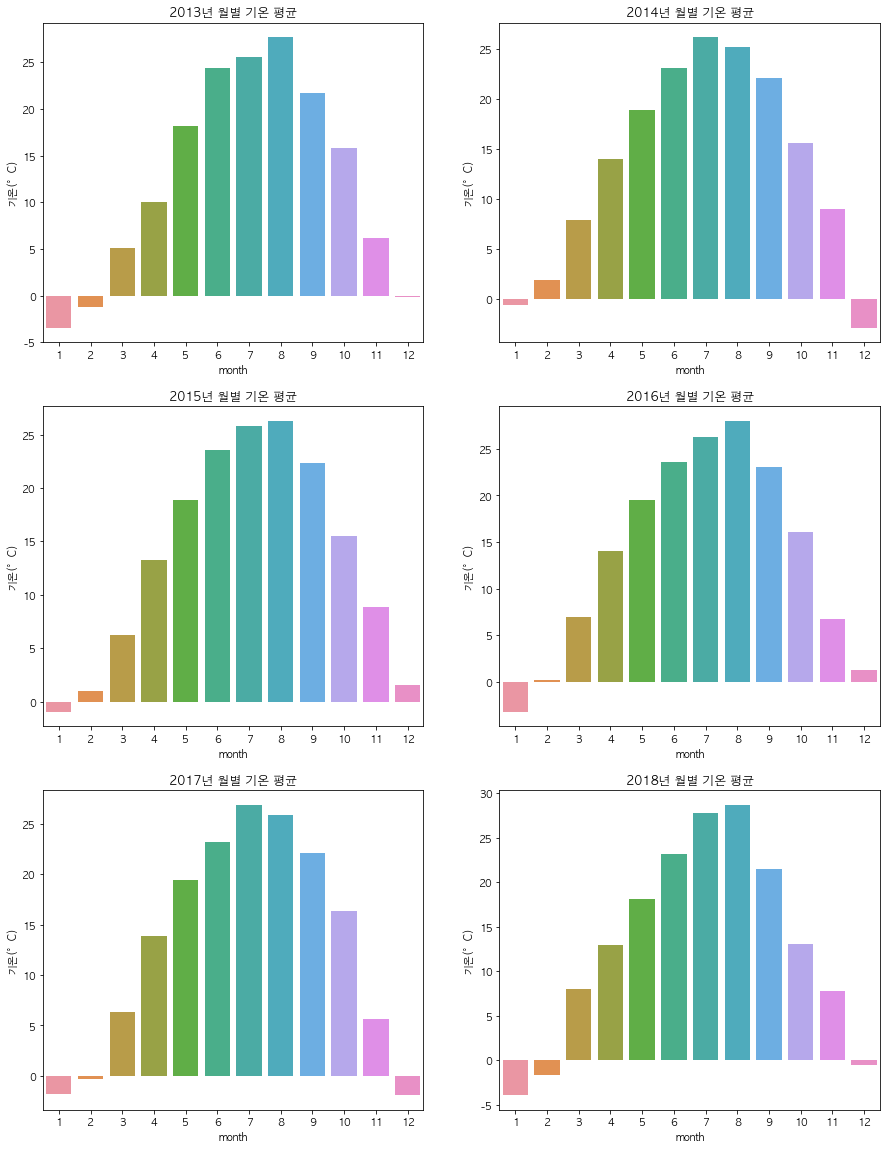

In [70]:
plt.figure(figsize = (15, 20))

for i in range(6) :
    plt.subplot(3, 2, i + 1)
#     plt.ylim([0, 3600])

    data = ym_mean_data[12 * i : 12 * (i + 1)]
    data = data.reset_index()
    
    sns.barplot(x = "month", y = "기온(°C)", data = data)
    plt.title(f"{2013 + i}년 월별 기온 평균")

### 전체 데이터 변수 상관관계

In [72]:
val = train[["year", "month", "day", "weekday", "구분_int", "공급량", "기온(°C)"]].corr()
val

,year,month,day,weekday,구분_int,공급량,기온(°C)
year,1.000000e+00,-1.753370e-04,2.016196e-04,6.682591e-04,-1.558615e-12,0.011755,5.049077e-03
month,-1.753370e-04,1.000000e+00,1.097865e-02,8.603019e-04,-5.038069e-15,-0.154787,2.298064e-01
day,2.016196e-04,1.097865e-02,1.000000e+00,-6.224648e-04,9.660995e-16,-0.001656,8.911949e-03
weekday,6.682591e-04,8.603019e-04,-6.224648e-04,1.000000e+00,-6.694492e-16,-0.039478,4.437524e-03
구분_int,-1.558615e-12,-5.038069e-15,9.660995e-16,-6.694492e-16,1.000000e+00,0.056511,4.764689e-16
공급량,1.175500e-02,-1.547875e-01,-1.656311e-03,-3.947779e-02,5.651131e-02,1.000000,-5.368968e-01
기온(°C),5.049077e-03,2.298064e-01,8.911949e-03,4.437524e-03,4.764689e-16,-0.536897,1.000000e+00


<AxesSubplot:>

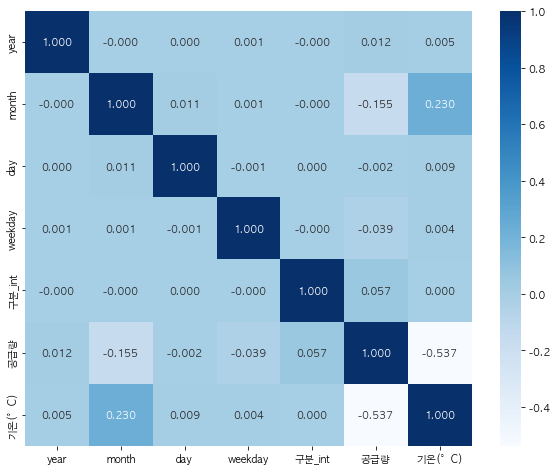

In [73]:
plt.figure(figsize = (10, 8))
sns.heatmap(val, cmap = "Blues", annot = True, fmt = ".3f")

### A 공급사 feature 상관관계

In [76]:
val = grouped_A[["year", "month", "day", "weekday", "공급량", "기온(°C)"]].corr()
val

,year,month,day,weekday,공급량,기온(°C)
year,1.000000,-0.000175,0.000202,0.000668,-0.010390,0.005049
month,-0.000175,1.000000,0.010979,0.000860,-0.244216,0.229806
day,0.000202,0.010979,1.000000,-0.000622,-0.003680,0.008912
weekday,0.000668,0.000860,-0.000622,1.000000,-0.072398,0.004438
공급량,-0.010390,-0.244216,-0.003680,-0.072398,1.000000,-0.835001
기온(°C),0.005049,0.229806,0.008912,0.004438,-0.835001,1.000000


<AxesSubplot:>

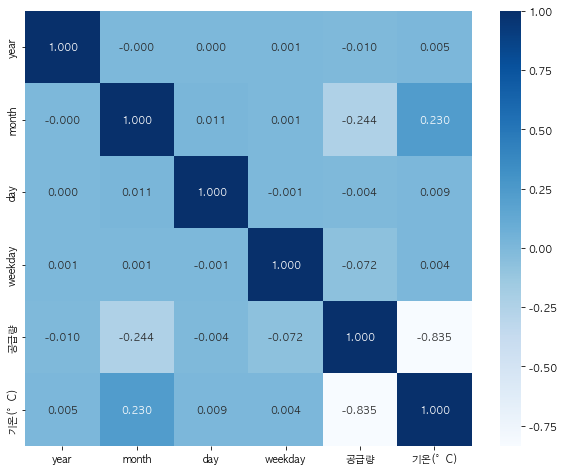

In [77]:
plt.figure(figsize = (10, 8))
sns.heatmap(val, cmap = "Blues", annot = True, fmt = ".3f")

### 공급량과 기온의 상관관계 그래프

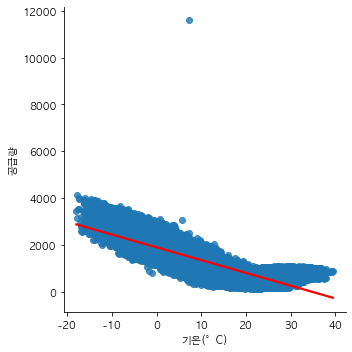

In [83]:
sns.lmplot(x = "기온(°C)", y = "공급량", data = grouped_A, line_kws = {"color" : "red"})

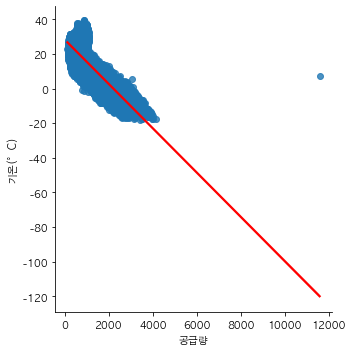

In [84]:
sns.lmplot(x = "공급량", y = "기온(°C)", data = grouped_A, line_kws = {"color" : "red"})

### 구분별 공급량 분포 -> displot

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

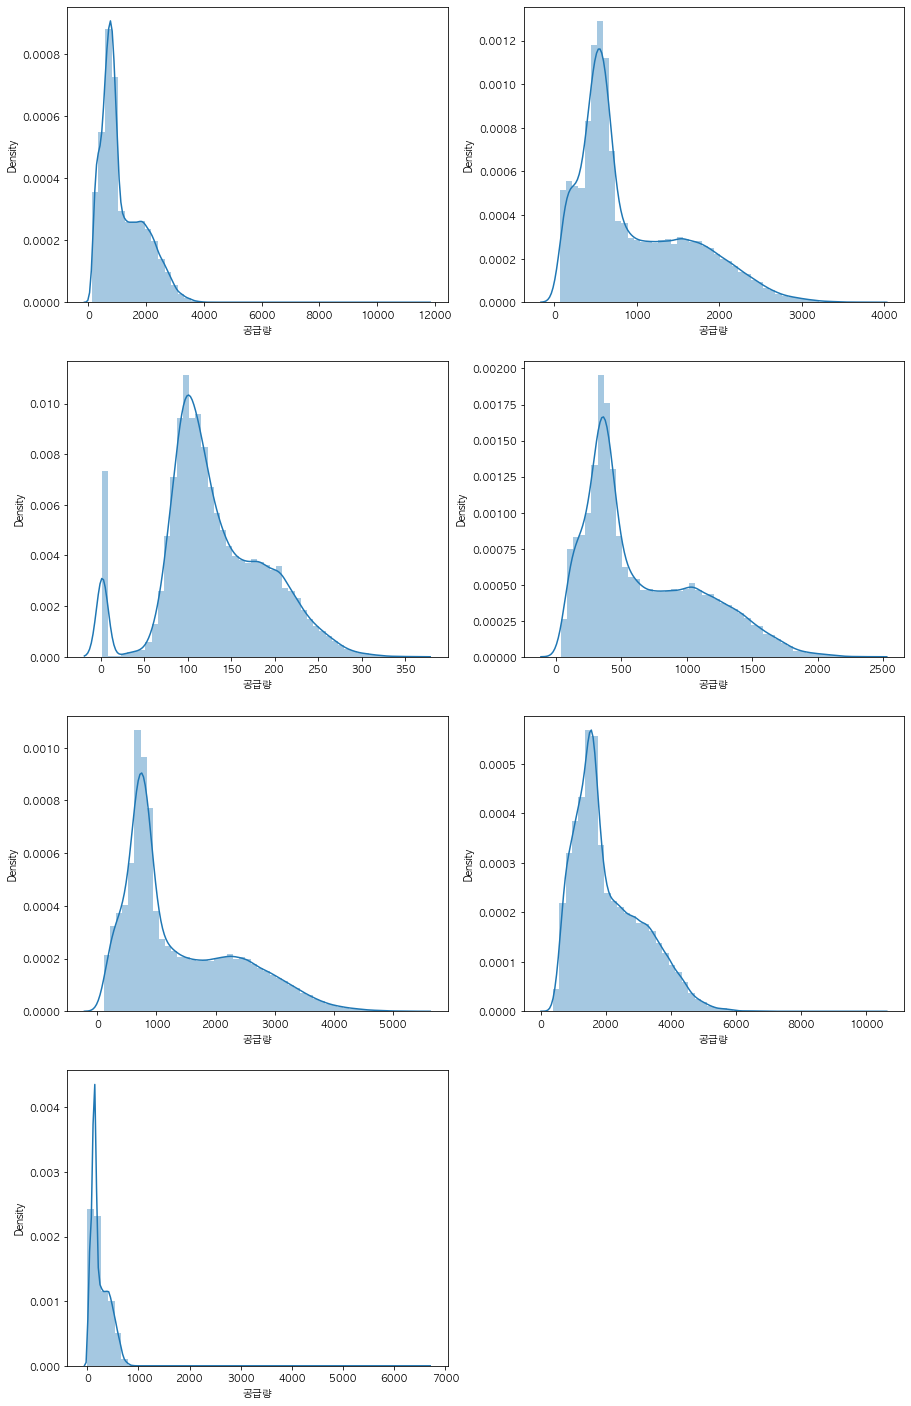

In [87]:
i = 0
plt.figure(figsize = (15, 25))

for df in group_list :
    i += 1
    plt.ylim([0, 3600])
    plt.subplot(4, 2, i)
    sns.distplot(df["공급량"])

### 구분별 공급량 분포 -> hist

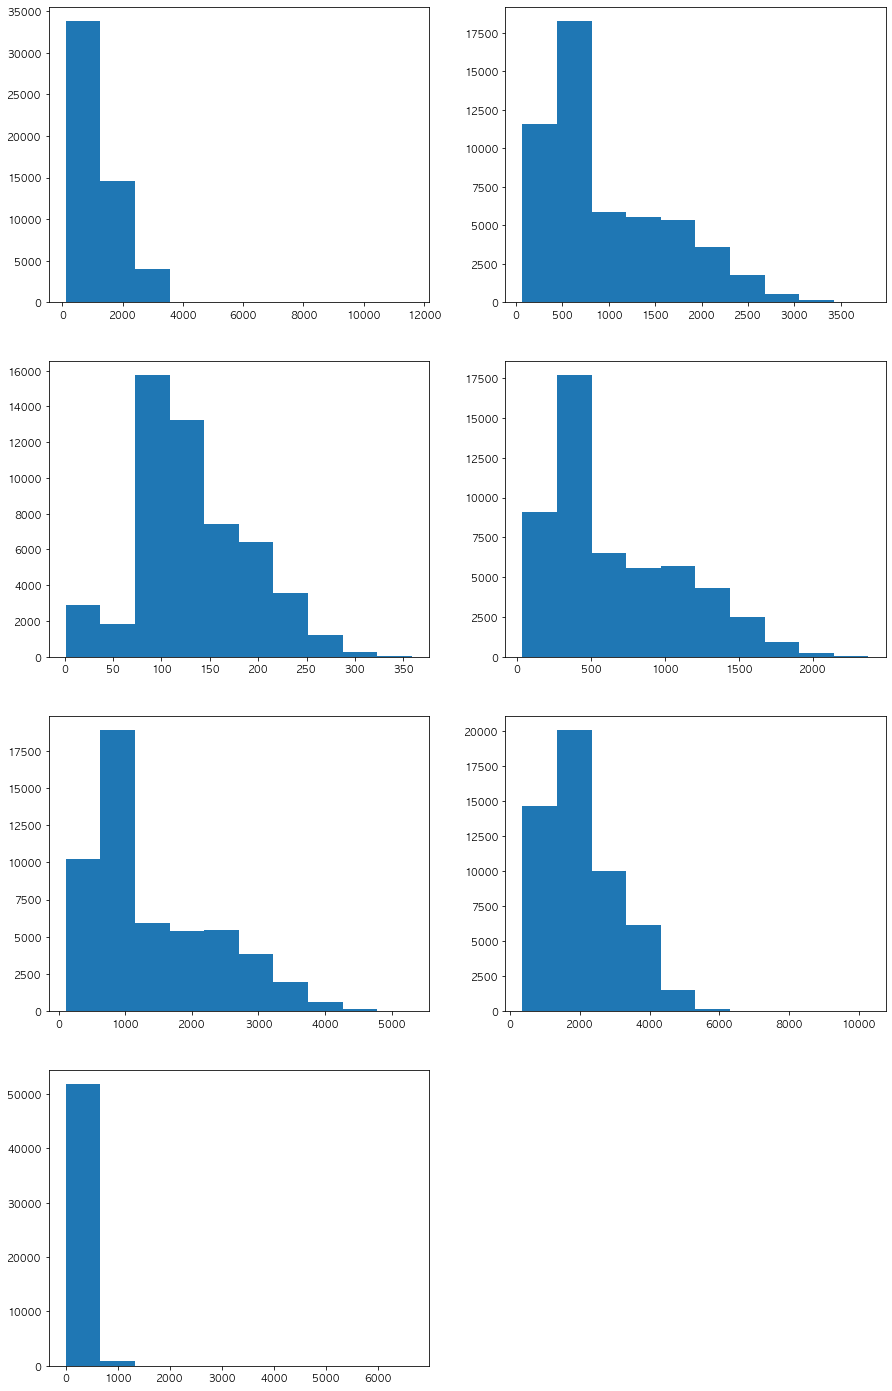

In [89]:
i = 0
plt.figure(figsize = (15, 25))

for df in group_list :
    i += 1
    plt.subplot(4, 2, i)
    plt.hist(df["공급량"])

### test data의 기간 확인

<AxesSubplot:xlabel='month', ylabel='count'>

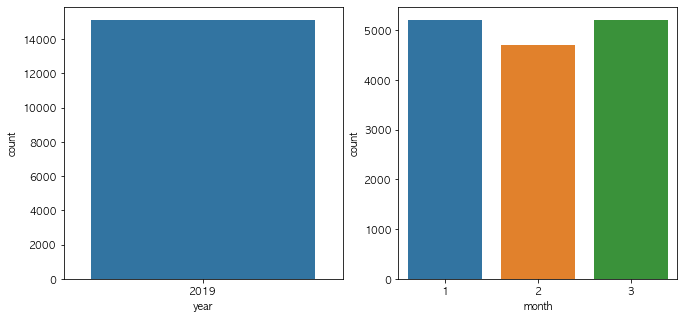

In [101]:
plt.figure(figsize = (17, 5))
plt.subplot(1, 3, 1)
sns.countplot(x = "year", data = test)

plt.subplot(1, 3, 2)
sns.countplot(x = "month", data = test)

# plt.subplot(1, 3, 3)
# sns.countplot(x = "시간", data = test)

### 월 평균 예측 기온

In [106]:
test_temp = test.groupby(["구분", "year", "month"]).mean()
test_temp.reset_index(inplace = True)
test_temp

,구분,year,month,시간,구분_int,day,hour,weekday,기온(°C)
0,A,2019,1,12.5,0.0,16.0,11.5,2.903226,-4.030780
1,A,2019,2,12.5,0.0,14.5,11.5,3.000000,-1.515476
2,A,2019,3,12.5,0.0,16.0,11.5,3.193548,7.997715
3,B,2019,1,12.5,1.0,16.0,11.5,2.903226,-4.030780
4,B,2019,2,12.5,1.0,14.5,11.5,3.000000,-1.515476
5,B,2019,3,12.5,1.0,16.0,11.5,3.193548,7.997715
6,C,2019,1,12.5,2.0,16.0,11.5,2.903226,-4.030780
7,C,2019,2,12.5,2.0,14.5,11.5,3.000000,-1.515476
8,C,2019,3,12.5,2.0,16.0,11.5,3.193548,7.997715
9,D,2019,1,12.5,3.0,16.0,11.5,2.903226,-4.030780


<AxesSubplot:xlabel='month', ylabel='기온(°C)'>

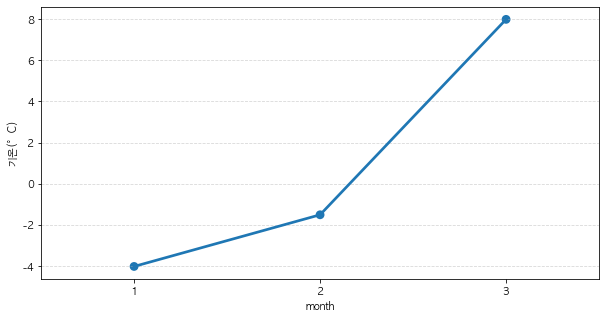

In [113]:
plt.figure(figsize = (10, 5))
plt.grid(True, axis = "both", alpha = 0.5, linestyle = "--")

sns.pointplot(x = "month", y = "기온(°C)", data = test_temp)
# sns.pointplot(x = "month", y = "기온(°C)", hue = "구분", data = test_temp)